## Step 1: Import Libraries and Load the Dataset

We use the Heart Disease dataset to build and evaluate decision tree and random forest classifiers. This dataset includes patient data and a binary target indicating heart disease presence.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Load dataset (adjust path as needed)
df = pd.read_csv("C:/Users/archi/OneDrive/Documents/elevate labs/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Step 2: Data Preprocessing

We split the dataset into features and target, scale the features, and create training and testing sets.

In [6]:
X = df.drop('target', axis=1)
y = df['target']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 3: Train Decision Tree and Visualize It

We train a basic decision tree classifier and visualize its structure using `plot_tree`. This helps understand how the tree makes decisions.

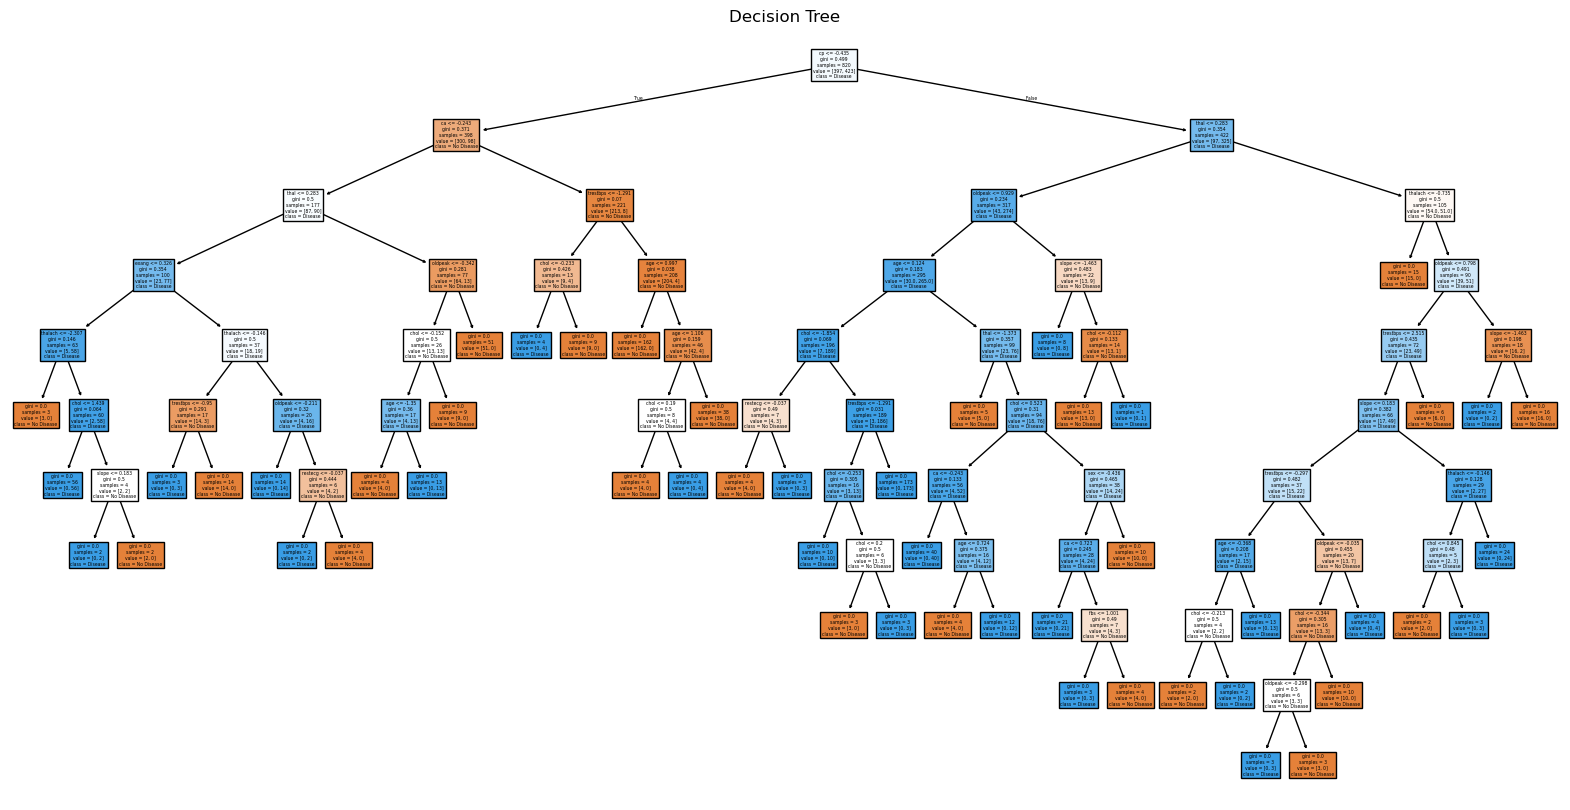

In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()

## Step 4: Evaluate Decision Tree

We assess the accuracy of the decision tree on the test set and examine the confusion matrix and classification report.

In [8]:
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.9853658536585366

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Step 5: Control Tree Depth to Prevent Overfitting

Deep trees can overfit training data. We set `max_depth` to limit complexity and improve generalization.

In [9]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

print("Pruned Tree Accuracy:", accuracy_score(y_test, dt_pruned.predict(X_test)))

Pruned Tree Accuracy: 0.8


## Step 6: Train Random Forest Classifier and Compare Accuracy

Random Forest combines many trees to improve accuracy and reduce overfitting via bagging.

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366

Confusion Matrix:
 [[102   0]
 [  3 100]]


## Step 7: Feature Importance

We examine which features contributed most to model predictions using the Random Forest's `feature_importances_`.

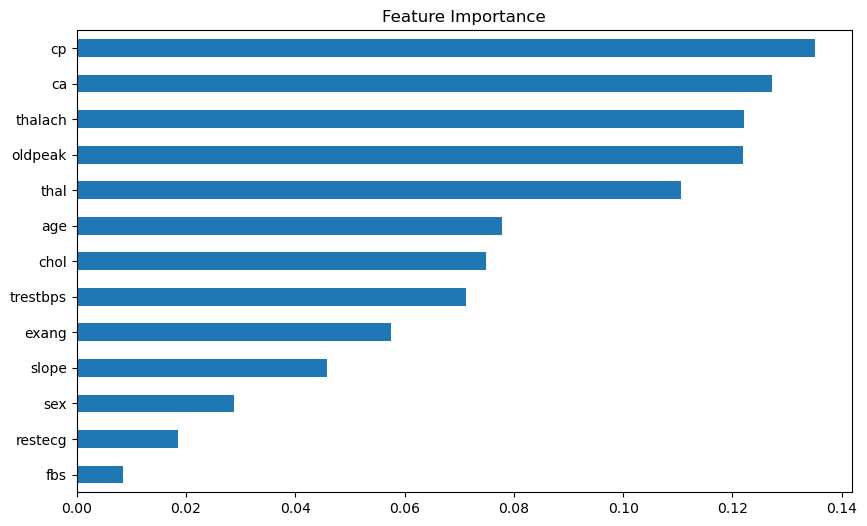

In [11]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.show()

## Step 8: Evaluate Model Using Cross-Validation

We use k-fold cross-validation to assess model performance consistency.

In [12]:
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
